# Alice in QuantumLand
##Quantum Teleportation Circuit

Alice and Bob, have been helping me (and I am sure many of you) understand the nuances of transmitting information securely and privately across communication channels ever since I was an undergrad student. Consequently, I am not surprised that I met them again when I was trying to teleport quantum information from one qubit to another.
Copying information from one classical bit to another doesn’t intrigue anyone, but copying one quantum bit information to another is a completely different game. (no-cloning theorem in quantum mechanics, prohibits identical copies of quantum states | also read about: “spooky action at a distance”)

So how does Alice send one qubit of quantum information to Bob?


In [11]:
# let's import all the libraries that Alice and Bob needs to communicate 
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
%matplotlib inline

In [12]:
# Define a Quantum circuit with three qubits and three classical bits for measurement 
#(Alice will teleport information from q0 to q2)

qc = QuantumCircuit(3,3)

# Alice can apply a Pauli X on q_0 to make it equivalent to classical 1 (Alice is trying to send information in q_0 to Bob)
# In this particular case she will send the output state of Hadamard gate to Bob
qc.h(0)
qc.barrier()

#We will create an entanglement (Bell state) between q_1 and q_2 and share it with both Alice and Bob
qc.h(1)
qc.cx(1,2)
qc.barrier()

# Alice applies a CNOT on q_1
qc.cx(0,1)
# Alice applies a Hadamard on q_0
qc.h(0)
# Alice measures the qubit 0 and qubit 1 and shares with Bob
qc.measure([0,1],[0,1])
qc.barrier()

# if Bob receives q_0=0 and q_1=0 he does nothing. 
# For q_0=0 and q_1=1 he applies Pauli-X
# for q_0=1 and q_1=0 he applies Pauli-Z
# for q_0=1 and q_1=1 he applies both X & Z
qc.cx(1,2)
qc.cz(0,2)

# q_0 is teleported to q_2
qc.measure(2,2)

In [13]:
qc.draw()

┌───┐ ░            ░      ┌───┐┌─┐ ░            
q_0: ┤ H ├─░────────────░───■──┤ H ├┤M├─░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├─┤M├──╫──░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────╫───╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░        ║   ║  ░ └───┘   └╥┘
c: 3/════════════════════════════╩═══╩═════════════╩═
                                 1   0             2

In [14]:
# We are going to simulate the code with qasm using 1000 shots 
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc, backend, shots=1000)

# store the results of the simulation in a variable
result_simulator = job_simulator.result()

{'000': 119, '001': 136, '010': 117, '011': 126, '100': 112, '101': 134, '110': 132, '111': 124}


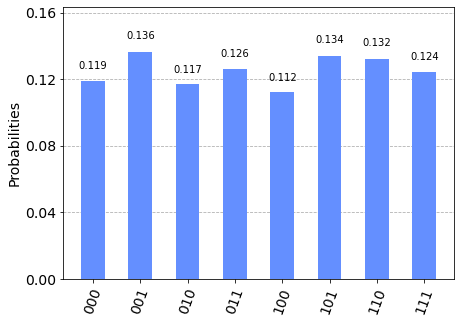

In [15]:
# we are going to count the frequcy of each possible states and plot it in a histogram
counts = result_simulator.get_counts(qc)
print(counts)
plot_histogram(counts)

Read the x-axis labels of the histogram as c_2, c_1 and c_0.
(c_0 measures q_0, c_1 measures q_1 and c_2 measures q_2)
Observe that c_2 has a value of 0 for 50% of the time and a value of 1 for the remaining 50% 
